***LOADING THE DATA, DATA CLEANING AND EXPLORATORY DATA ANALYSIS***


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('1850-2025.csv')
df.shape
print(df.head())

     Date  Anomaly
0  185001    -0.45
1  185002    -0.20
2  185003    -0.21
3  185004    -0.35
4  185005    -0.29


In [82]:
# Convert 'Date' from int YYYYMM to datetime
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m')

# Display the first few rows to verify the conversion
print(df.head())

AnomalyData = df
AnomalyData.set_index('Date', inplace=True)


        Date  Anomaly
0 1850-01-01    -0.45
1 1850-02-01    -0.20
2 1850-03-01    -0.21
3 1850-04-01    -0.35
4 1850-05-01    -0.29


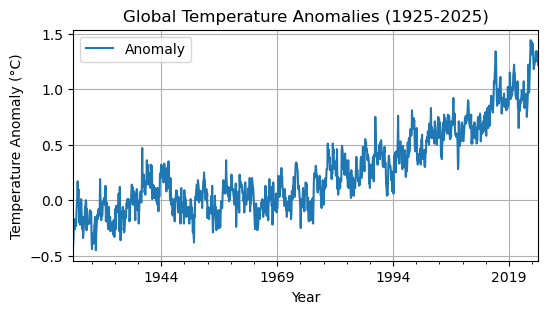

In [83]:
#group data of the last 100 years
century = AnomalyData.loc["1925-01-01":"2025-04-01"]
# Plotting the data
plot = century.plot(figsize=(6, 3), title='Global Temperature Anomalies (1925-2025)')
plt.xlabel('Year') 
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


This is a plot of the global temoerature anomalies over the last century. 

What is a temperature anomaly? 

A temperature anomaly is the difference between an observed temperature and a base temperature which is usually a long term average.

In this line plot we see that there is a definite increase in the value of the anomalies over the past century. Its still quite hard to see if there are any trends in this data due to the yearly fluctuations. to solve this we will need to make a rolling mean plot. 

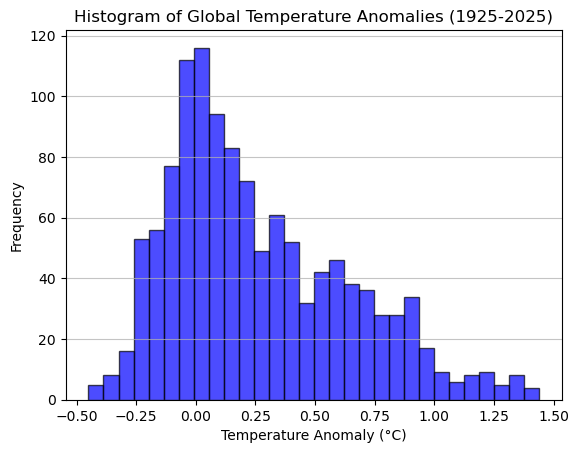

In [84]:
century['Anomaly'].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Global Temperature Anomalies (1925-2025)')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This histogram shows the distribution of anomalies over the past century, we can see here that majority of the recordings where close to a 0 degree change which would make sense because the temperature should always be close to the long term average. 

The recent increase in temperature has resulted in higher anomalies at an increasing rate, approximately starting around 1979. The increase could be easily neglected by saying its natural disasters causing the temperatures to rise or fall. This increase has been over a long period of time unlike the somewhat steady change prior to 1979. 

Its true that natural disasters cause dramatic temperature fluctuations but no constant rise over long periods of time.

Seeing this increase in temperature was a real eye opener to what people were doing to the planet and resulted in many efforts to educate and discover about global warming. 

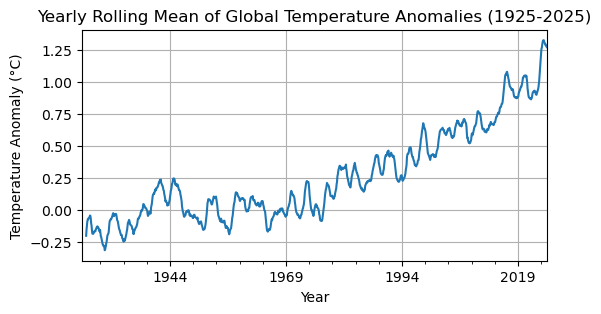

In [85]:
rolling_mean_year = century['Anomaly'].rolling(window=12).mean()
rolling_mean_year.plot(figsize=(6, 3), title='Yearly Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

This plot is a yearly mean anomaly plot over the last century. Using a rolling mean helps a lot with finding any trends in the data. here we see a very rapid increase in recent years and a large increase and decrease of average temperature around 1944. This data can still be pretty hard to read because of all the different fluctuations and its still pretty noisy.

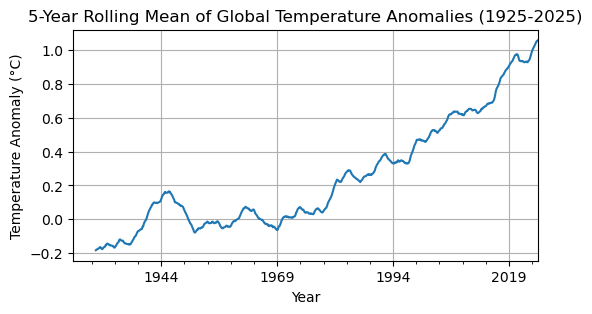

In [86]:
rolling_mean_5years = century['Anomaly'].rolling(window=60).mean()
rolling_mean_5years.plot(figsize=(6, 3), title='5-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

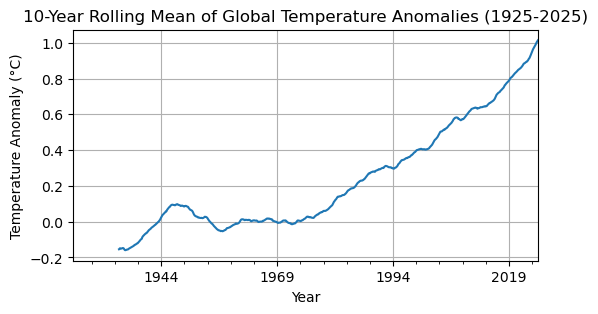

In [87]:
rolling_mean_10years = century['Anomaly'].rolling(window=120).mean()
rolling_mean_10years.plot(figsize=(6, 3), title='10-Year Rolling Mean of Global Temperature Anomalies (1925-2025)')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

In [88]:
summary_stats = century.describe()
print("Summary Statistics of Global Temperature Anomalies (1925-2025):" + str(summary_stats.round(2)))

Summary Statistics of Global Temperature Anomalies (1925-2025):       Anomaly
count  1204.00
mean      0.26
std       0.38
min      -0.45
25%      -0.02
50%       0.17
75%       0.52
max       1.44


***STATISTICAL ANALYSIS AND MODELLING***

In [89]:

yearly_df = century['Anomaly'].resample('YE').mean().reset_index()

yearly_df['Year'] = yearly_df['Date'].dt.year

print(yearly_df.head())


        Date   Anomaly  Year
0 1925-12-31 -0.203333  1925
1 1926-12-31 -0.071667  1926
2 1927-12-31 -0.167500  1927
3 1928-12-31 -0.157500  1928
4 1929-12-31 -0.315833  1929


***linear regression***

In [90]:
from sklearn.linear_model import LinearRegression

X = yearly_df['Year'].to_numpy().reshape(-1, 1)
y = yearly_df['Anomaly'].to_numpy()

model = LinearRegression()
model.fit(X, y)

yearly_df['Predicted_linear'] = model.predict(X)


In [91]:
model_slope = model.coef_[0]
model_intercept = model.intercept_

print("Slope of the linear regression model:", model_slope, "°C per year")
print("Intercept of the linear regression model:", model_intercept, "°C")
print("R-squared of the linear regression model:", model.score(X, y))
print("Warming per decade:", model_slope * 10, "°C per decade")

Slope of the linear regression model: 0.011452601436614248 °C per year
Intercept of the linear regression model: -22.350785527082117 °C
R-squared of the linear regression model: 0.8025004870463748
Warming per decade: 0.11452601436614249 °C per decade


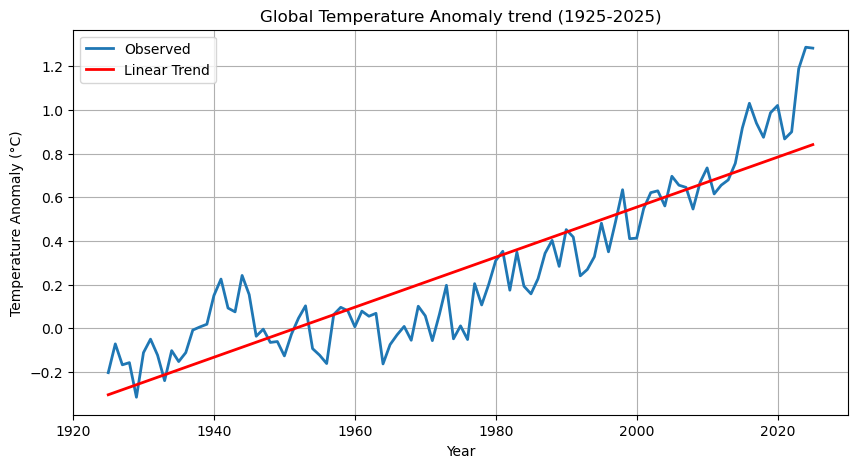

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_df['Year'],yearly_df['Anomaly'], label='Observed', linewidth=2)
plt.plot(yearly_df['Year'], yearly_df['Predicted_linear'], label='Linear Trend', color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly trend (1925-2025)')
plt.legend()
plt.grid(True)
plt.show()


The information given to us by the linear regression model shows that the global warming per decade over the past century is 0.11 degrees celsius. 

Using a linear regression is helpful to identify long term trends (it cancels out any fluctuations), quantify the rate of change, predict future values through extrapolation and to compare our findings to others. 

The linear regression model gives us numerical answers and shows us that the temperature is rising overall, instead of the earlier approches of simply looking at the data on the graph. 

The R squared value of the model is also quite high with a value of 0.8 showing a strong positive correlations between temperature anomaly and year.

A linear regression model isnt good at finding seasonal patterns or non linear behaiviour, which the raw data does have. 


I want to see how the linear regression model predicts future anomalies the cell below does that. 
a linear regression model is just a straight line. The formula for a straight line is y = mx + b.

I want to find the predicted anomaly for the year 2040. so it will be the slope(2040) + intercept.

I also want to see the accuracy of the linear regression estimates compared to the known values from the raw data, i'll choose the year 2024.

In [93]:
linearPrediction2040 = (model_slope * 2040) + model_intercept
print("The predicted anomaly for the year 2040 using Linear Regression is:", round(linearPrediction2040, 2), "°C")
print(yearly_df[yearly_df['Year'] == 2024])

The predicted anomaly for the year 2040 using Linear Regression is: 1.01 °C
         Date   Anomaly  Year  Predicted_linear
99 2024-12-31  1.286667  2024           0.82928


***prophet***

17:47:47 - cmdstanpy - INFO - Chain [1] start processing
17:47:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Muhammed\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Text(67.09722222222221, 0.5, 'Temperature Anomaly (°C)')

<Figure size 600x300 with 0 Axes>

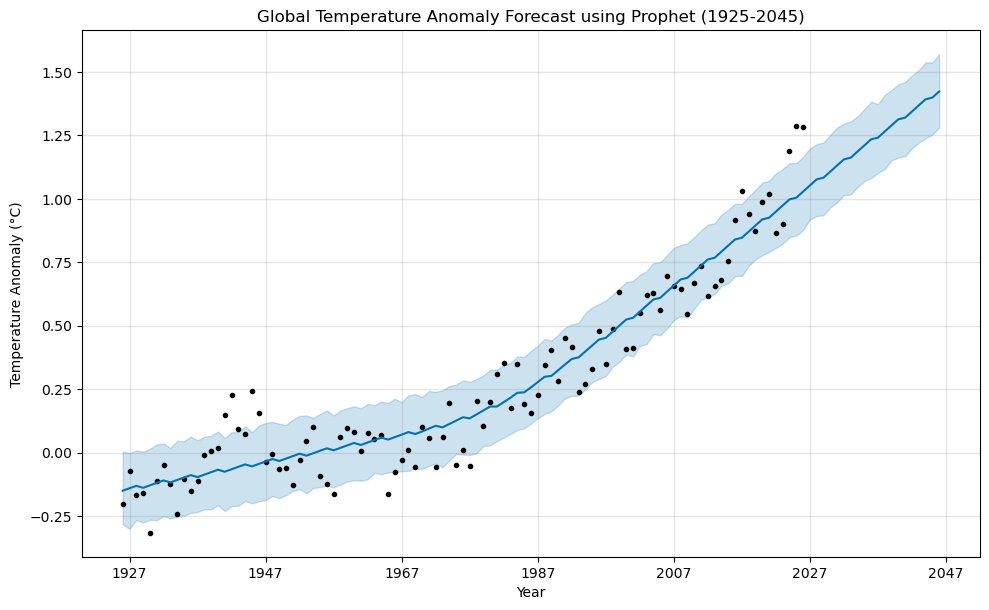

In [94]:
from prophet import Prophet

proph_df = yearly_df[['Date', 'Anomaly']].rename(columns={'Date': 'ds', 'Anomaly': 'y'})
proph_model = Prophet()
proph_model.fit(proph_df)

future_anomalies = proph_model.make_future_dataframe(periods=20, freq='Y')
future_forecast = proph_model.predict(future_anomalies)

plt.figure(figsize=(6, 3))
proph_model.plot(future_forecast)
plt.title('Global Temperature Anomaly Forecast using Prophet (1925-2045)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')


The slope of the linear regression model from Prophet trend: 0.013385713454145097 °C per year
The intercept of the linear regression model from Prophet trend: -26.192643904909307 °C
The R-squared of the linear regression model from Prophet trend: 0.9382854505960325
The warming per decade from Prophet trend: 0.13385713454145098 °C per decade


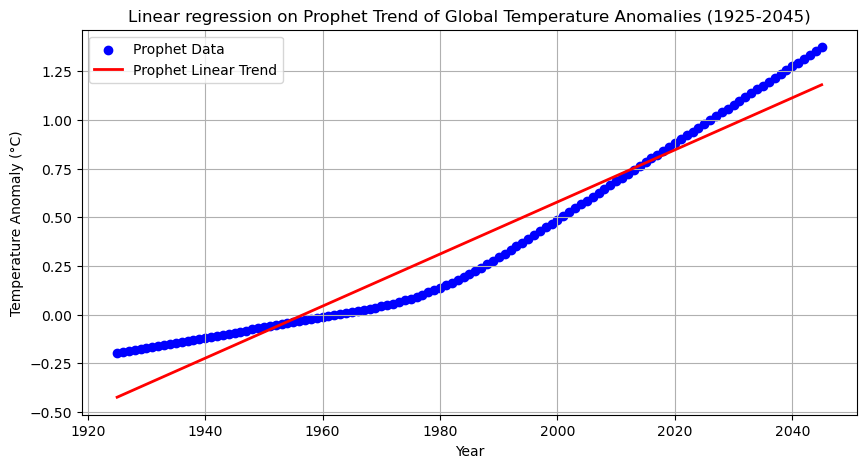

In [95]:
trend_df = future_forecast[['ds', 'trend']].copy()
trend_df['Year'] = trend_df['ds'].dt.year

X = trend_df['Year'].to_numpy().reshape(-1, 1)
y = trend_df['trend'].to_numpy()
model = LinearRegression()
model.fit(X, y)

trend_slope = model.coef_[0]
trend_intercept = model.intercept_
trend_r_squared = model.score(X, y)
trend_warming_per_decade = trend_slope * 10

print("The slope of the linear regression model from Prophet trend:", trend_slope, "°C per year") 
print("The intercept of the linear regression model from Prophet trend:", trend_intercept, "°C")
print("The R-squared of the linear regression model from Prophet trend:", trend_r_squared)
print("The warming per decade from Prophet trend:", trend_warming_per_decade, "°C per decade")

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label = 'Prophet Data', color='blue')
plt.plot(X, model.predict(X), label='Prophet Linear Trend', color='red', linewidth=2)
plt.xlabel('Year') 
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Linear regression on Prophet Trend of Global Temperature Anomalies (1925-2045)')
plt.legend()
plt.grid(True)
plt.show()

Above we see that using time-series-forecasting using prophet on the data and then fitting a linear regression model on that data produces different results for the linear regression on raw data. This is because prophet already predicted future outcomes and the regression line was fitted to those predictions, instead of extrapolating the line made on raw data. 

I want to see how the anomaly in 2040 compares when using time-series-forecasting with prophet to the anomaly in 2040 from simple linear extrapolation as well as how it compares to a linear regression on the prophet data. I had made a new dataframe consisting of the new values till 2045 that prophet predicted for me, ill just take that record from the dataframe and see what the predicted anomaly is.

In [96]:
print("The predicted anomaly for the year 2040 using a linear regression model from prophet trend is: ",
      round((trend_slope * 2040) + trend_intercept, 2), "°C")

print("The predicted anomaly for the year 2040 using only prophet prediction is: ", round(trend_df.iat[115,1], 2), "°C")

The predicted anomaly for the year 2040 using a linear regression model from prophet trend is:  1.11 °C
The predicted anomaly for the year 2040 using only prophet prediction is:  1.28 °C


***polynomial regression***

        Date   Anomaly  Year  Predicted_linear  Predicted_poly
0 1925-12-31 -0.203333  1925         -0.304528       -0.131649
1 1926-12-31 -0.071667  1926         -0.293075       -0.124973
2 1927-12-31 -0.167500  1927         -0.281623       -0.118540
3 1928-12-31 -0.157500  1928         -0.270170       -0.112338
4 1929-12-31 -0.315833  1929         -0.258717       -0.106356


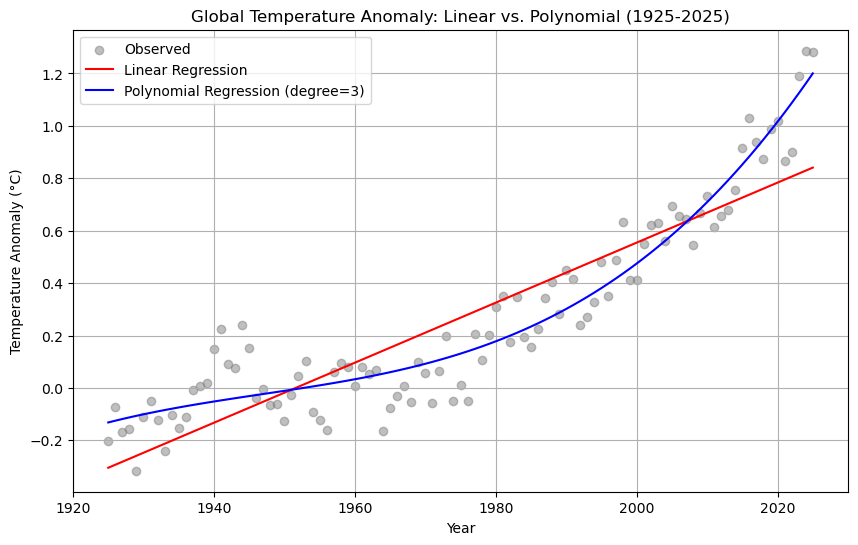

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

X = yearly_df['Year'].to_numpy().reshape(-1, 1)
y = yearly_df['Anomaly'].to_numpy()


linear_model = LinearRegression().fit(X, y)
y_linear_pred = linear_model.predict(X)
poly = PolynomialFeatures(degree=3)
poly_X = poly.fit_transform(X)
poly_model = LinearRegression().fit(poly_X, y)
y_poly_pred = poly_model.predict(poly_X)

yearly_df['Predicted_poly'] = y_poly_pred

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Observed', alpha=0.5)
plt.plot(X, y_linear_pred, label='Linear Regression', color='red')
plt.plot(X, y_poly_pred, label='Polynomial Regression (degree=3)', color='blue')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomaly: Linear vs. Polynomial (1925-2025)")
plt.legend()
plt.grid(True)
plt.show()



The polynomial regression on the yearly data from 1925 - 2025 visually looks like a better fit on the raw data.

Im going to do a similar thing and find a prediction for the year 2040 using the polynomial regression curve. 

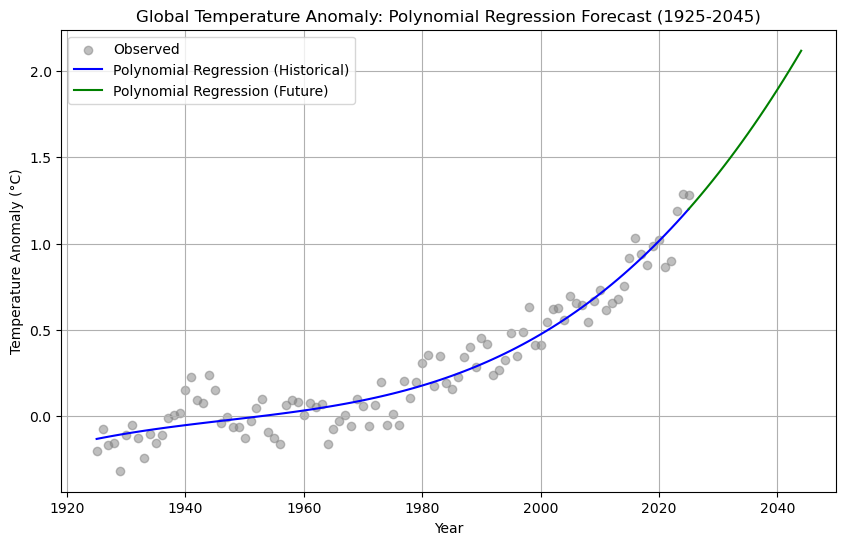

The predicted anomaly for the year 2040 using Polynomial Regression is:  1.89 °C


In [100]:
poly_future  = np.arange(2025, 2045).reshape(-1, 1)

poly_future_preds = poly_model.predict(poly.fit_transform(poly_future))

poly_future_df = pd.DataFrame({
    'Year': poly_future.flatten(),
    'Predicted_Poly': poly_future_preds
})

plt.figure(figsize=(10, 6))
plt.scatter(yearly_df['Year'], yearly_df['Anomaly'], label='Observed', color='gray', alpha=0.5)
plt.plot(yearly_df['Year'], yearly_df['Predicted_poly'], label='Polynomial Regression (Historical)', color='blue')
plt.plot(poly_future_df['Year'], poly_future_df['Predicted_Poly'], label='Polynomial Regression (Future)', color='green')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomaly: Polynomial Regression Forecast (1925-2045)")
plt.legend()
plt.grid(True)
plt.show()

print("The predicted anomaly for the year 2040 using Polynomial Regression is: ", round(poly_future_df[poly_future_df['Year'] == 2040]['Predicted_Poly'].values[0], 2), "°C")